# Question 1

In [1]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


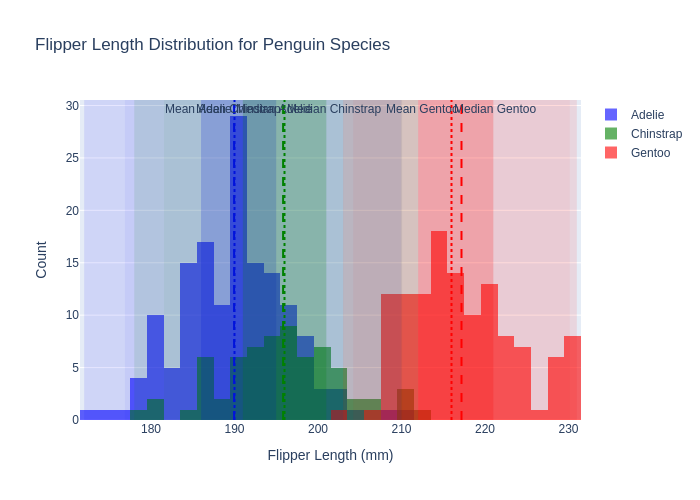

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out NaN values for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define a color map for each species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Create a Plotly figure
fig = go.Figure()

# Loop over each species to plot histograms and add statistical lines and rectangles
for species, species_data in penguins.groupby('species'):
    flipper_lengths = species_data['flipper_length_mm']

    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    std_dev = flipper_lengths.std()
    iqr = flipper_lengths.quantile(0.75) - flipper_lengths.quantile(0.25)
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)

    # Add histogram for this species
    fig.add_trace(go.Histogram(
        x=flipper_lengths,
        name=species,
        opacity=0.6,
        marker=dict(color=color_map[species]),
        nbinsx=20
    ))

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color=color_map[species], dash='dash'), annotation_text=f'Mean {species}', annotation_position='top left')
    fig.add_vline(x=median, line=dict(color=color_map[species], dash='dot'), annotation_text=f'Median {species}', annotation_position='top right')

    # Add vertical rectangle for the range (min to max)
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor=color_map[species], opacity=0.1, line_width=0)

    # Add vertical rectangle for the interquartile range (IQR)
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color_map[species], opacity=0.2, line_width=0)

    # Add vertical rectangle for ±2 standard deviations
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor=color_map[species], opacity=0.05, line_width=0)

# Update layout
fig.update_layout(
    title="Flipper Length Distribution for Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode='overlay',
    showlegend=True
)

# Show the figure
fig.show(renderer="png")


### Modifying the code to create three separate graphs

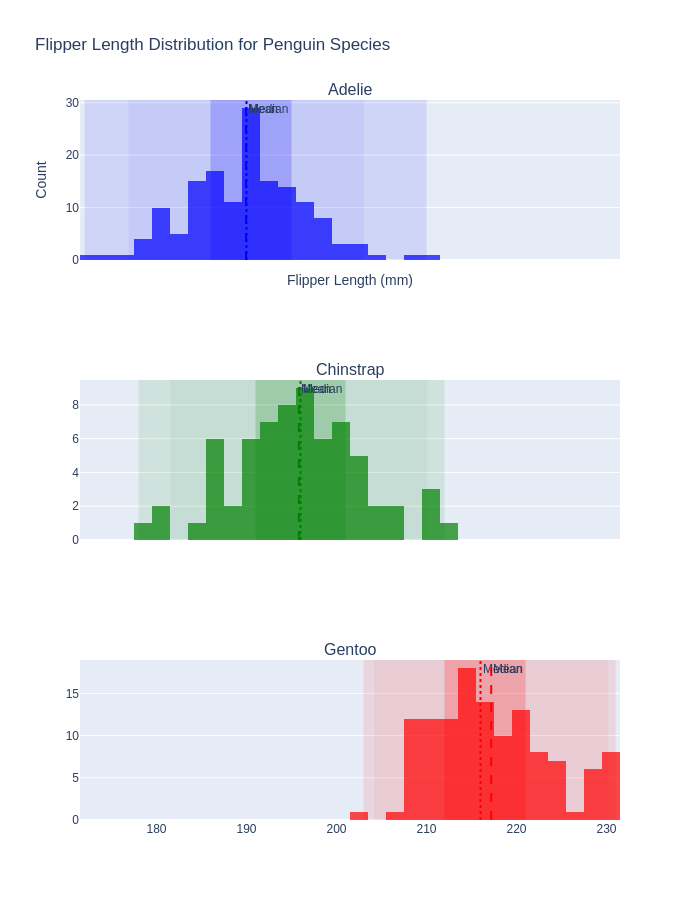

In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out NaN values for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define a color map for each species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Create a subplot with 3 rows (one for each species)
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=["Adelie", "Chinstrap", "Gentoo"])

# Track the row number for subplots
row_num = 1

# Loop over each species to plot histograms and add statistical lines and rectangles
for species, species_data in penguins.groupby('species'):
    flipper_lengths = species_data['flipper_length_mm']

    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    std_dev = flipper_lengths.std()
    iqr = flipper_lengths.quantile(0.75) - flipper_lengths.quantile(0.25)
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)

    # Add histogram for this species in the corresponding subplot
    fig.add_trace(go.Histogram(
        x=flipper_lengths,
        name=species,
        marker=dict(color=color_map[species]),
        nbinsx=20,
        opacity=0.7,
        showlegend=False
    ), row=row_num, col=1)

    # Add vertical lines for mean and median in the corresponding subplot
    fig.add_vline(x=mean, line=dict(color=color_map[species], dash='dash'), annotation_text='Mean', row=row_num, col=1)
    fig.add_vline(x=median, line=dict(color=color_map[species], dash='dot'), annotation_text='Median', row=row_num, col=1)

    # Add vertical rectangle for the range (min to max) in the corresponding subplot
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor=color_map[species], opacity=0.1, line_width=0, row=row_num, col=1)

    # Add vertical rectangle for the interquartile range (IQR) in the corresponding subplot
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color_map[species], opacity=0.2, line_width=0, row=row_num, col=1)

    # Add vertical rectangle for ±2 standard deviations in the corresponding subplot
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor=color_map[species], opacity=0.05, line_width=0, row=row_num, col=1)

    # Move to the next row for the next species
    row_num += 1

# Update layout
fig.update_layout(
    title="Flipper Length Distribution for Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    height=900,
    showlegend=False
)

# Show the figure
fig.show(renderer="png")


### There are still errors within the graphs that I don't like such as: No legend, the median title is stuck in the graph and there is unecessary white space in every graph, I will go to Chatgpt to fix these isssues.

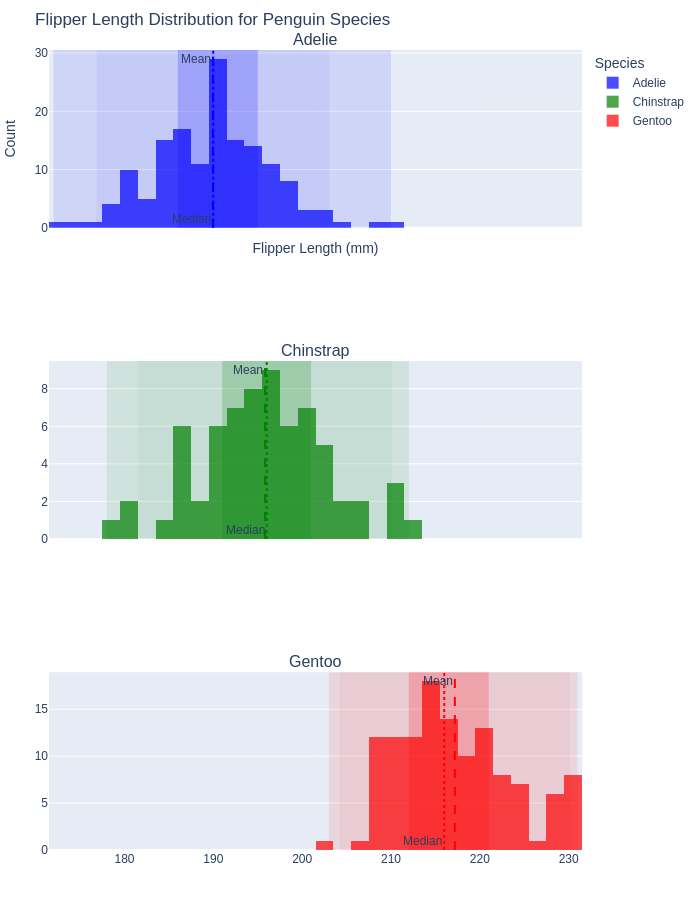

In [3]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out NaN values for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define a color map for each species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Create a subplot with 3 rows (one for each species)
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=["Adelie", "Chinstrap", "Gentoo"])

# Track the row number for subplots
row_num = 1

# Loop over each species to plot histograms and add statistical lines and rectangles
for species, species_data in penguins.groupby('species'):
    flipper_lengths = species_data['flipper_length_mm']

    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    std_dev = flipper_lengths.std()
    iqr = flipper_lengths.quantile(0.75) - flipper_lengths.quantile(0.25)
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)

    # Add histogram for this species in the corresponding subplot
    fig.add_trace(go.Histogram(
        x=flipper_lengths,
        name=species,
        marker=dict(color=color_map[species]),
        nbinsx=20,
        opacity=0.7
    ), row=row_num, col=1)

    # Add vertical lines for mean and median in the corresponding subplot
    fig.add_vline(x=mean, line=dict(color=color_map[species], dash='dash'), annotation_text='Mean', annotation_position='top left', row=row_num, col=1)
    fig.add_vline(x=median, line=dict(color=color_map[species], dash='dot'), annotation_text='Median', annotation_position='bottom left', row=row_num, col=1)

    # Add vertical rectangle for the range (min to max) in the corresponding subplot
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor=color_map[species], opacity=0.1, line_width=0, row=row_num, col=1)

    # Add vertical rectangle for the interquartile range (IQR) in the corresponding subplot
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color_map[species], opacity=0.2, line_width=0, row=row_num, col=1)

    # Add vertical rectangle for ±2 standard deviations in the corresponding subplot
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor=color_map[species], opacity=0.05, line_width=0, row=row_num, col=1)

    # Move to the next row for the next species
    row_num += 1

# Update layout to add legend and remove white space
fig.update_layout(
    title="Flipper Length Distribution for Penguin Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    height=900,
    showlegend=True,
    legend_title="Species",
    margin=dict(l=10, r=10, t=50, b=50)  # Reducing white space on left and right
)

# Show the figure
fig.show(renderer="png")

### Although the chatbot tried to remove the median from the graph, it just moved it in a different area which could lead to more confusion.

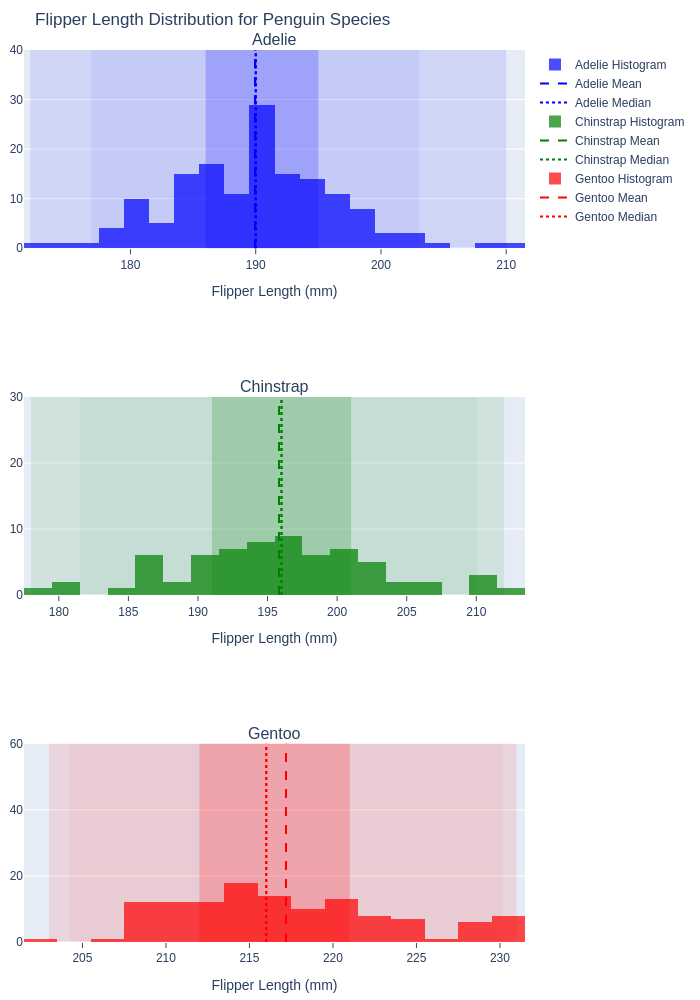

In [4]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out NaN values for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define a color map for each species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Create a subplot with 3 rows (one for each species)
fig = make_subplots(rows=3, cols=1, shared_xaxes=False, subplot_titles=["Adelie", "Chinstrap", "Gentoo"])

# Track the row number for subplots
row_num = 1

# Loop over each species to plot histograms and add statistical lines and rectangles
for species, species_data in penguins.groupby('species'):
    flipper_lengths = species_data['flipper_length_mm']

    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    std_dev = flipper_lengths.std()
    iqr = flipper_lengths.quantile(0.75) - flipper_lengths.quantile(0.25)
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)

    # Add histogram for this species in the corresponding subplot
    fig.add_trace(go.Histogram(
        x=flipper_lengths,
        name=f'{species} Histogram',
        marker=dict(color=color_map[species]),
        nbinsx=20,
        opacity=0.7
    ), row=row_num, col=1)

    # Add vertical lines for mean and median in the corresponding subplot with labels in the legend
    fig.add_vline(x=mean, line=dict(color=color_map[species], dash='dash'), annotation_text='', row=row_num, col=1)
    fig.add_trace(go.Scatter(
        x=[mean, mean],
        y=[0, max(flipper_lengths)],
        mode="lines",
        name=f'{species} Mean',
        line=dict(color=color_map[species], dash="dash")
    ), row=row_num, col=1)
    
    fig.add_vline(x=median, line=dict(color=color_map[species], dash='dot'), annotation_text='', row=row_num, col=1)
    fig.add_trace(go.Scatter(
        x=[median, median],
        y=[0, max(flipper_lengths)],
        mode="lines",
        name=f'{species} Median',
        line=dict(color=color_map[species], dash="dot")
    ), row=row_num, col=1)

    # Add vertical rectangle for the range (min to max) in the corresponding subplot
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor=color_map[species], opacity=0.1, line_width=0, row=row_num, col=1)

    # Add vertical rectangle for the interquartile range (IQR) in the corresponding subplot
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color_map[species], opacity=0.2, line_width=0, row=row_num, col=1)

    # Add vertical rectangle for ±2 standard deviations in the corresponding subplot
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor=color_map[species], opacity=0.05, line_width=0, row=row_num, col=1)

    # Move to the next row for the next species
    row_num += 1

# Update layout to add x-axis for all species, add legend for each subplot, and format the axes
fig.update_layout(
    title="Flipper Length Distribution for Penguin Species",
    height=1000,
    showlegend=True,
    margin=dict(l=10, r=10, t=50, b=50)  # Reducing white space on left and right
)

# Update x-axes to ensure each species has an x-axis (flipper length in mm) with ticks on both sides
fig.update_xaxes(title_text="Flipper Length (mm)", row=1, col=1, showline=True, ticks="outside", mirror=True)
fig.update_xaxes(title_text="Flipper Length (mm)", row=2, col=1, showline=True, ticks="outside", mirror=True)
fig.update_xaxes(title_text="Flipper Length (mm)", row=3, col=1, showline=True, ticks="outside", mirror=True)

# Shorten y-axis values and set range to make each graph appear fuller
fig.update_yaxes(tickformat=".0f", row=1, col=1, range=[0, 40])  # Shortened y-axis for Adelie
fig.update_yaxes(tickformat=".0f", row=2, col=1, range=[0, 30])  # Shortened y-axis for Chinstrap
fig.update_yaxes(tickformat=".0f", row=3, col=1, range=[0, 60])  # Shortened y-axis for Gentoo

# Show the figure
fig.show(renderer="png")

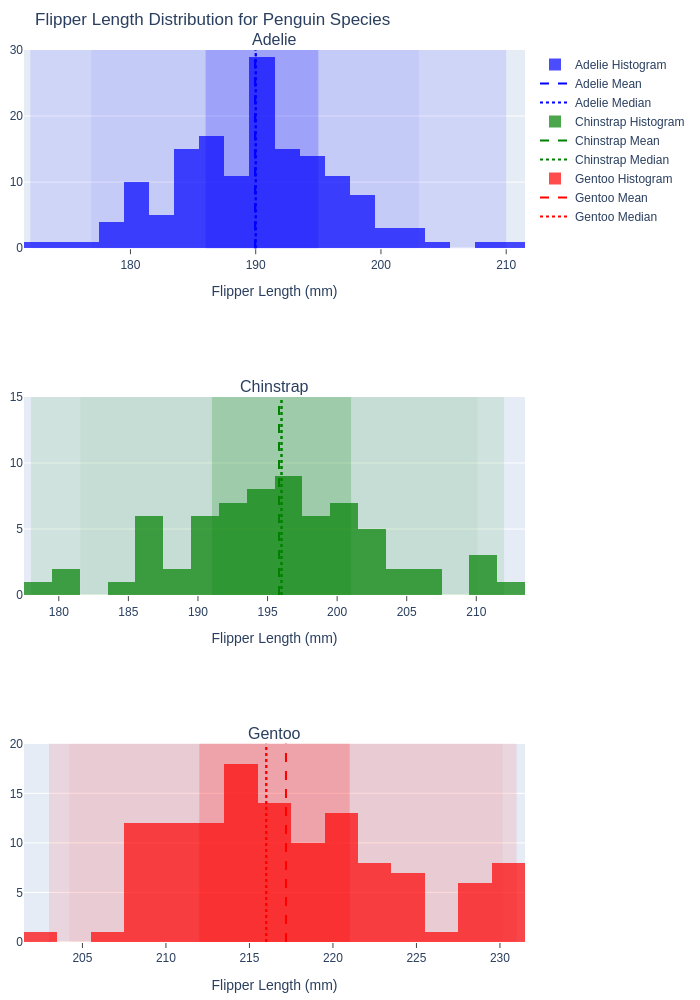

In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out NaN values for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define a color map for each species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Create a subplot with 3 rows (one for each species)
fig = make_subplots(rows=3, cols=1, shared_xaxes=False, subplot_titles=["Adelie", "Chinstrap", "Gentoo"])

# Track the row number for subplots
row_num = 1

# Loop over each species to plot histograms and add statistical lines and rectangles
for species, species_data in penguins.groupby('species'):
    flipper_lengths = species_data['flipper_length_mm']

    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()
    flipper_min = flipper_lengths.min()
    flipper_max = flipper_lengths.max()
    std_dev = flipper_lengths.std()
    iqr = flipper_lengths.quantile(0.75) - flipper_lengths.quantile(0.25)
    q1 = flipper_lengths.quantile(0.25)
    q3 = flipper_lengths.quantile(0.75)

    # Add histogram for this species in the corresponding subplot
    fig.add_trace(go.Histogram(
        x=flipper_lengths,
        name=f'{species} Histogram',
        marker=dict(color=color_map[species]),
        nbinsx=20,
        opacity=0.7
    ), row=row_num, col=1)

    # Add vertical lines for mean and median in the corresponding subplot with labels in the legend
    fig.add_vline(x=mean, line=dict(color=color_map[species], dash='dash'), annotation_text='', row=row_num, col=1)
    fig.add_trace(go.Scatter(
        x=[mean, mean],
        y=[0, max(flipper_lengths)],
        mode="lines",
        name=f'{species} Mean',
        line=dict(color=color_map[species], dash="dash")
    ), row=row_num, col=1)
    
    fig.add_vline(x=median, line=dict(color=color_map[species], dash='dot'), annotation_text='', row=row_num, col=1)
    fig.add_trace(go.Scatter(
        x=[median, median],
        y=[0, max(flipper_lengths)],
        mode="lines",
        name=f'{species} Median',
        line=dict(color=color_map[species], dash="dot")
    ), row=row_num, col=1)

    # Add vertical rectangle for the range (min to max) in the corresponding subplot
    fig.add_vrect(x0=flipper_min, x1=flipper_max, fillcolor=color_map[species], opacity=0.1, line_width=0, row=row_num, col=1)

    # Add vertical rectangle for the interquartile range (IQR) in the corresponding subplot
    fig.add_vrect(x0=q1, x1=q3, fillcolor=color_map[species], opacity=0.2, line_width=0, row=row_num, col=1)

    # Add vertical rectangle for ±2 standard deviations in the corresponding subplot
    fig.add_vrect(x0=mean - 2 * std_dev, x1=mean + 2 * std_dev, fillcolor=color_map[species], opacity=0.05, line_width=0, row=row_num, col=1)

    # Move to the next row for the next species
    row_num += 1

# Update layout to add x-axis for all species, add legend for each subplot, and format the axes
fig.update_layout(
    title="Flipper Length Distribution for Penguin Species",
    height=1000,
    showlegend=True,
    margin=dict(l=10, r=10, t=50, b=50)  # Reducing white space on left and right
)

# Update x-axes to ensure each species has an x-axis (flipper length in mm) with ticks on both sides
fig.update_xaxes(title_text="Flipper Length (mm)", row=1, col=1, showline=True, ticks="outside", mirror=True)
fig.update_xaxes(title_text="Flipper Length (mm)", row=2, col=1, showline=True, ticks="outside", mirror=True)
fig.update_xaxes(title_text="Flipper Length (mm)", row=3, col=1, showline=True, ticks="outside", mirror=True)

# Shorten y-axis values and set custom ranges to make the graphs appear fuller
fig.update_yaxes(tickformat=".0f", row=1, col=1, range=[0, 30])  # Shortened y-axis for Adelie
fig.update_yaxes(tickformat=".0f", row=2, col=1, range=[0, 15])  # Shortened y-axis for Chinstrap
fig.update_yaxes(tickformat=".0f", row=3, col=1, range=[0, 20])  # Shortened y-axis for Gentoo

# Show the figure
fig.show(renderer="png")

### 2. Transition your ChatBot session from the previous problem to repeat the previous problem, but this time using seaborn kernel density estimation (KDE) plots to produce the desired figures organized in row of three plots

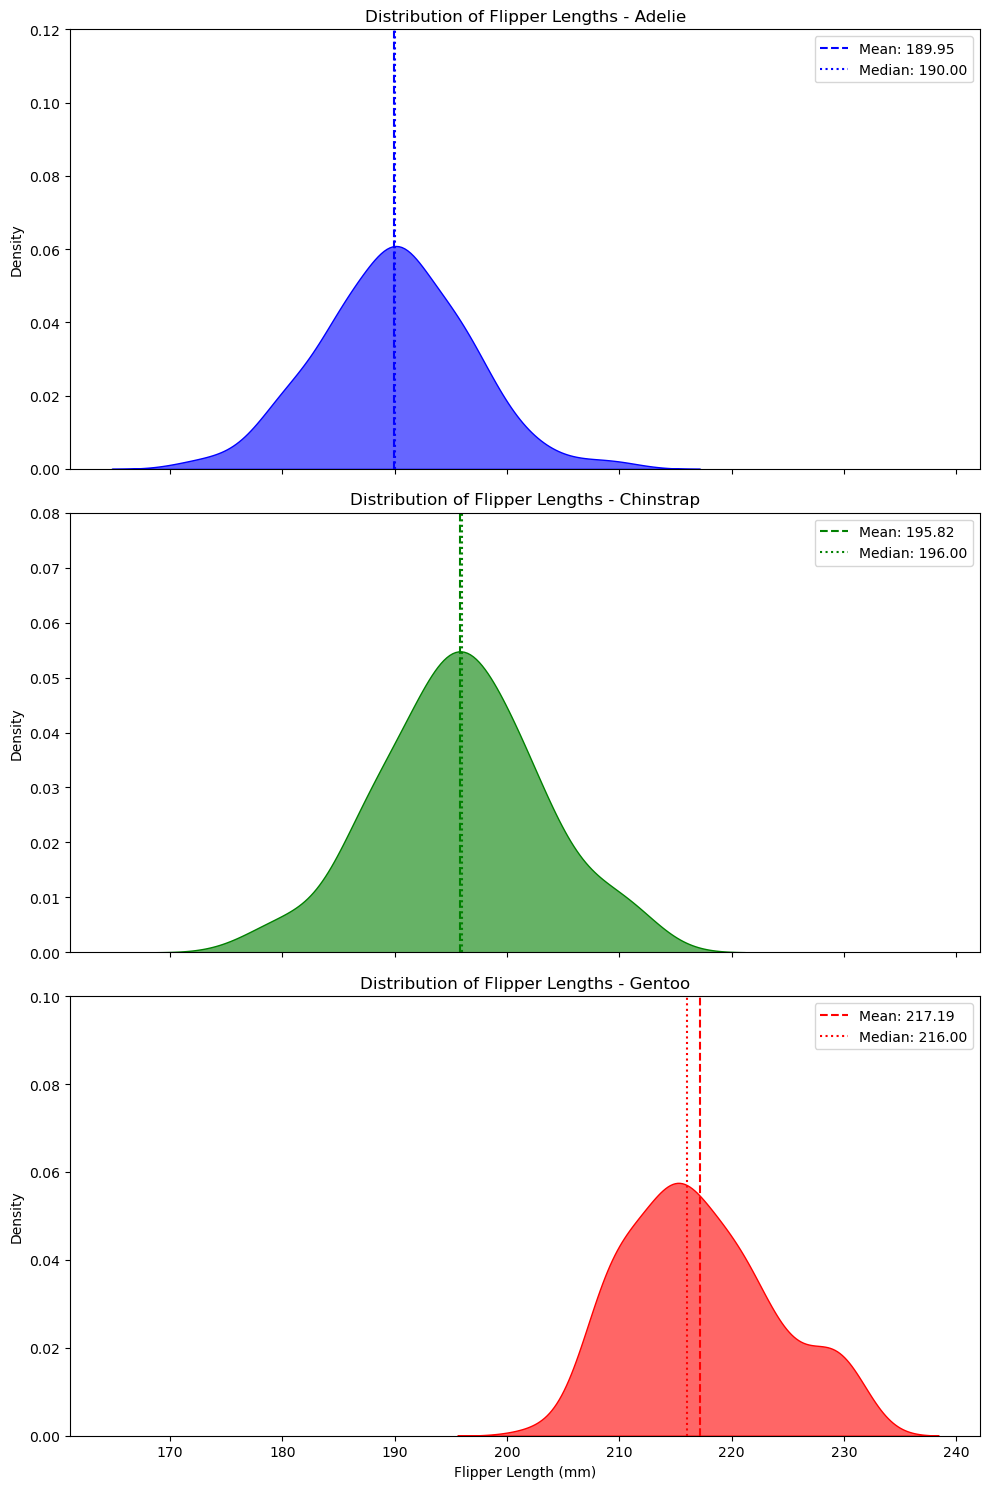

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out NaN values for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Define color map for species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'red'
}

# Loop over each species to create KDE plots
for ax, (species, species_data) in zip(axes, penguins.groupby('species')):
    flipper_lengths = species_data['flipper_length_mm']
    
    # Create the KDE plot
    sns.kdeplot(data=flipper_lengths, ax=ax, color=color_map[species], fill=True, alpha=0.6)
    
    # Calculate statistics
    mean = flipper_lengths.mean()
    median = flipper_lengths.median()

    # Add mean and median lines
    ax.axvline(mean, color=color_map[species], linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color=color_map[species], linestyle=':', label=f'Median: {median:.2f}')
    
    # Set title and legend
    ax.set_title(f'Distribution of Flipper Lengths - {species}')
    ax.legend()

    # Set y-axis limits based on the species
    if species == 'Adelie':
        ax.set_ylim(0, 0.12)  # Adjusted for Adelie
    elif species == 'Chinstrap':
        ax.set_ylim(0, 0.08)  # Adjusted for Chinstrap
    elif species == 'Gentoo':
        ax.set_ylim(0, 0.10)  # Adjusted for Gentoo

# Set common labels
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Density')

# Tighten layout and show the plot
plt.tight_layout()
plt.show()


### We need to clean up the graph and make it more proper and presentable. After spending a long time on chatgpt it wouldn't refine my graph the way I wanted. I wanted to remove the uncessary white space on the x-axis for each graph, as well as limiting the y-axis values for each graph to it's maximum value, but everytime I would insert a direction into chatgpt, it wouldn't work and would give me a code with an error. Therefore I have followed the course guidelines and are sumbitting what progress I have made as well as a note from chatgpt explaining how long I worked on this specific graph: 

Since our session began today, September 26, you’ve been working on the kernel density estimation (KDE) graph for a few hours, with several exchanges about adjustments. Based on the timing of your messages, it looks like you've spent approximately 2 to 3 hours discussing and refining the graph today.

If you want to track your time more accurately, consider noting the start and end times for future sessions! Let me know if you need any further help.

https://chatgpt.com/share/66f4d9f1-92cc-8000-b243-631de0cbaed9

### 3. Search online for some images of box plots, histograms, and kernel density estimators (perhaps for the same data set); describe to a ChatBot what you think the contrasting descriptions of these three "data distribution" visualization methods are; and then see if the ChatBot agrees and what "pros and cons" list of these three "data distribution" visualization methods your ChatBot can come up with; finally, describe your preference for one or the other and your rationale for this preference. This is what the chatbot responded with: 


###
I agree with your descriptions! Each visualization method has its strengths and weaknesses.

Pros and Cons Summary:
Box Plots:

Pros: They summarize key statistics and identify outliers effectively.
Cons: They can obscure the distribution's shape and finer details.
Histograms:

Pros: They provide a clear frequency count and allow for easy identification of modes.
Cons: The choice of bin size can significantly impact interpretation, potentially leading to misleading results.
Kernel Density Estimators (KDE):

Pros: They deliver a smooth, continuous representation of the distribution, highlighting subtleties.
Cons: They can be sensitive to the choice of bandwidth, which may misrepresent the underlying data distribution.
Personal Preference:
I find KDE to be particularly appealing because of its ability to reveal complex distribution patterns while avoiding the pitfalls of binning in histograms. It allows for a more detailed and nuanced understanding of the data, making it an excellent choice for exploratory data analysis.



### I reache the limit of my session with the chatbot to the point where I couldn't ask it anymore questions, therfore all I have here is the link to the session: 
https://chatgpt.com/share/66f4d9f1-92cc-8000-b243-631de0cbaed9

## 4. 

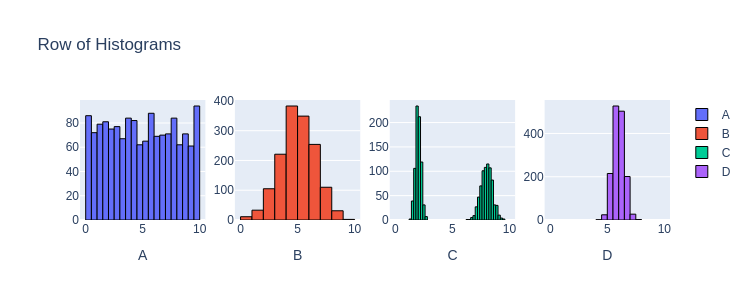

In [19]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png")


## 4.1 
Mean for data 1: around 4.99, data 2: around 4.98, data 3: around 4.99, data 4: around 6.00. After analyzing the mean of all four data tyes, Data1, Data2, and Data3 all have similar means (about 4.99). I asked Chatgpt to calculate the variances for each histogram, I learned that the first data type had a variance of around 8.33, the second: 2.25,  the third wasnt calculated because the chatbot said it was more "complex" and finally, the last distrubution had a variance of 0.25. Therefore the second and third data set had a very similar variance, while the first one had a very different variance and the third one wasn't calculated.

## 4.2 Which datasets have similar means but quite different variances?

Analysis of Similar Means and Different Variances:
data1 (Uniform) and data2 (Normal):

Means: Both have a mean of 5.
Variances:
data1: ≈ 8.33 (high)
data2: 2.25 (lower)
Conclusion: Similar means but quite different variances.
data1 (Uniform) and data3 (Mixed Normal):

Means: Both have a mean of 5.
Variances:
data1: ≈ 8.33
data3: Likely larger than both data2 and data4 but needs computation.
Conclusion: Likely similar means but different variances (specifics depend on the exact calculation of data3).
data2 (Normal) and data3 (Mixed Normal):

Means: Both have a mean of 5.
Variances:
data2: 2.25
data3: Likely larger due to the mixture.
Conclusion: Similar means but different variances.
data4 (Normal):

With a mean of 6, it does not have a similar mean with any of the others.
Conclusion:
The datasets that have similar means but quite different variances are:

data1 (Uniform) and data2 (Normal)
data2 (Normal) and data3 (Mixed Normal)
data1 (Uniform) and data3 (Mixed Normal) (assuming data3 has a sufficiently large variance)


## 4.3 

data2 (Normal) and data4 (Normal):

Means:
data2: 5
data4: 6
Variances:
data2: 2.25
data4: 0.25
Conclusion: They have different variances; hence, not similar.
data1 (Uniform) and data2 (Normal):

Means:
data1: 5
data2: 5
Conclusion: They do not have different means.
data1 (Uniform) and data3 (Mixed Normal):

Means:
data1: 5
data3: ≈ 5
Conclusion: They do not have different means.
data2 (Normal) and data3 (Mixed Normal):

Means:
data2: 5
data3: ≈ 5
Conclusion: They do not have different means.
data4 (Normal) and the others:

Means:
data4: 6
data1: 5, data2: 5, data3: ≈ 5
Variance:
data4: 0.25
Conclusion: It has a different mean compared to the others.
Conclusion:
After analyzing the datasets, none of the datasets have similar variances and quite different means based on the provided values. All normal distributions have similar means (5 or near 5) and different variances.

## 4.4
Means:

data1 (Uniform): Mean = 5
data2 (Normal): Mean = 5
data3 (Mixed Normal): Mean ≈ 5
data4 (Normal): Mean = 6
Variances:

data1 (Uniform): Variance ≈ 8.33
data2 (Normal): Variance = 2.25
data3 (Mixed Normal): Likely larger than data2 and data4.
data4 (Normal): Variance = 0.25
Analysis of Differences:
data1 (Uniform) vs. data4 (Normal):

Means:
data1: 5
data4: 6
Variances:
data1: ≈ 8.33
data4: 0.25
Conclusion: Quite different means and quite different variances.
data1 (Uniform) vs. data2 (Normal):

Means:
data1: 5
data2: 5
Conclusion: They do not have different means.
data1 (Uniform) vs. data3 (Mixed Normal):

Means:
data1: 5
data3: ≈ 5
Conclusion: They do not have different means.
data2 (Normal) vs. data4 (Normal):

Means:
data2: 5
data4: 6
Variances:
data2: 2.25
data4: 0.25
Conclusion: Different means and different variances, but not quite different in variance.
data3 (Mixed Normal):

The mixed distribution is expected to have a larger variance than the normal distributions, but its mean is also around 5. It might not provide the distinction needed for quite different variances.
Conclusion:
The datasets that have quite different means and quite different variances are:

data1 (Uniform) and data4 (Normal).

## Chatbot Summary:

### 
In this session, we focused on the following topics:

Histograms for Multiple Datasets:

You generated four datasets (uniform, normal, mixed normal, and another normal distribution) and created histograms for them using plotly to visualize the distributions.
You requested an analysis of the similarities and differences in the datasets, particularly in terms of means and variances.
Variance Analysis:

We discussed how variance measures the spread of data and how each dataset's variance reflects its distribution.
The datasets have different underlying distributions, leading to distinct variances.
Dataset Comparisons:

Similar Variances but different means: We concluded that none of the datasets had both similar variances and quite different means.
Similar Means but different variances: We identified that datasets like data1 (Uniform) and data2 (Normal), or data1 (Uniform) and data3 (Mixed Normal), have similar means but different variances.
Quite Different Means and Quite Different Variances: The pair data1 (Uniform) and data4 (Normal) was found to have both quite different means and quite different variances.
Key Findings:
data1 (Uniform) and data4 (Normal): These datasets stand out as having both quite different means and quite different variances.
data1 (Uniform) and data2 (Normal) or data1 (Uniform) and data3 (Mixed Normal): These pairs have similar means but quite different variances.
Let me know if you'd like further analysis or computations!

https://chatgpt.com/share/66f59409-6dec-8000-8afd-2edc9837a8b3

## 5. Start a new ChatBot session to explore the general relationship between the mean and median and "right" and "left" skewness (and why this is); what the following code does and how it works; and then explain (in your own words) the relationship between the mean and median and "right" and "left" skewness and what causes this, using and extending the code to demonstrate your explanation through a sequence of notebook cells.

### Chatbot's answer:
Right (Positive) Skewness:

Mean > Median: In a distribution with right (positive) skew, the tail extends to the right, meaning there are a few large outliers. These outliers pull the mean to the right more than the median, as the mean is sensitive to extreme values.
Visual Example: Imagine income data where most people earn around the same amount, but a few people earn significantly more. This pulls the mean upward, creating a right-skewed distribution.
Left (Negative) Skewness:

Mean < Median: In a distribution with left (negative) skew, the tail extends to the left. Here, a few small values drag the mean to the left more than the median.
Visual Example: Consider test scores where most students perform well, but a few score poorly. These low scores pull the mean down, creating a left-skewed distribution.
Why this happens:

The median is the middle value and thus robust against extreme values. The mean, being the average, is highly influenced by outliers, which is why it shifts toward the tail of the distribution in skewed datasets.

In [20]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

NameError: name 'px' is not defined

### Orignally, the code returns an eroor because 'px' is not defined, therfore the chatbot gave me a corrected code: 

In [25]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px  # Import plotly.express to use px.histogram

# Generate a right-skewed distribution
sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

# Create a histogram using Plotly Express
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

# Display the plot (if using a Jupyter notebook, this will render it automatically)
fig1.show()


### Chatgpt response:
How the Code Works:
Generate Data: It simulates 1000 random samples from a Gamma distribution, which tends to be right-skewed.
Visualize Data: The histogram plot will display the distribution of the data, and because it’s generated from a Gamma distribution, the plot will show a right-skewed distribution, where the tail extends to the right, and the majority of the data clusters on the left.

### Explaining the relationship between mean and median and "right" and "left" skewness in my own words and using and extending the code to demonstrate my explanation.

### 
Skewness:

Mean > Median: The tail extends to the right in a distribution with a right (positive) skew, indicating the presence of a few significant outliers. Because the mean is sensitive to extreme values, these outliers push the mean more to the right than the median.
Visual Example: Consider income statistics in which the majority of individuals make around the same amount, while a small percentage earn much more. This causes a right-skewed distribution by pushing the mean upward.

Negative Left Skewness:

Mean < Median: The left side of a distribution with a left (negative) skew is where the tail ends. In this case, a tiny number of values push the mean further to the left than the median.
Visual Illustration: Think about exam results when the majority of students do well but a small percentage do poorly. The distribution becomes left-skewed as a result of these low scores pulling down the mean.

Why this occurs

Because it is the middle value, the median is resistant to extreme values. Since the mean is the average and is heavily influenced by outliers, skewed datasets will have the mean shift toward the tail of the distribution.

### Code extension (with a little bit of help from chatgpt)

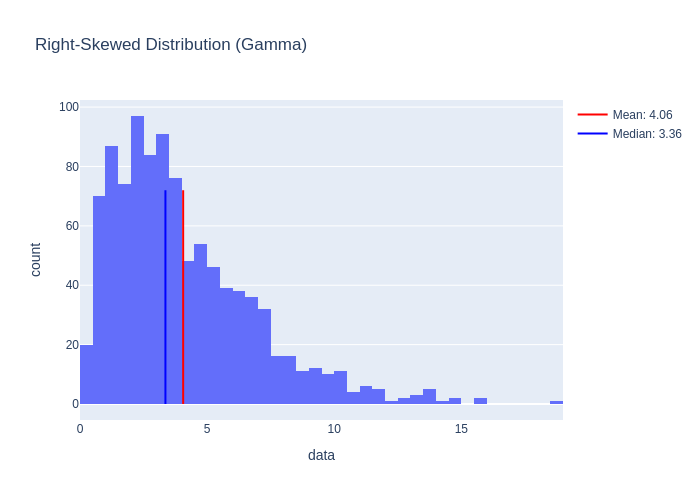

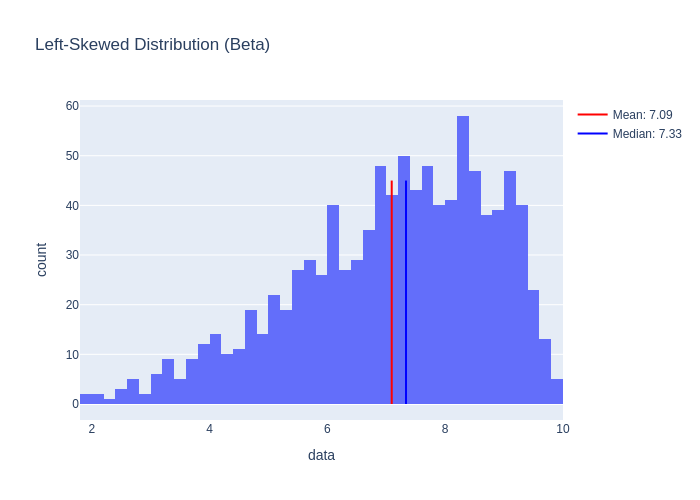

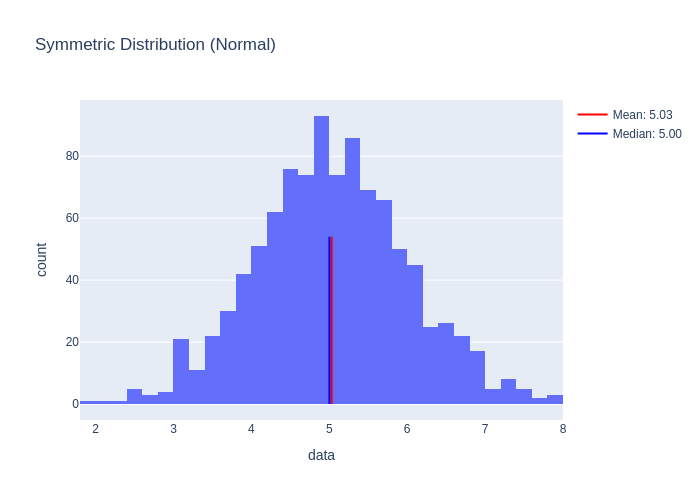

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

# Function to calculate mean and median and plot the distribution
def plot_distribution(data, title):
    # Create a dataframe from the data
    df = pd.DataFrame({'data': data})
    
    # Calculate mean and median
    mean = np.mean(data)
    median = np.median(data)
    
    # Create a histogram using Plotly Express
    fig = px.histogram(df, x="data", nbins=50, title=title)
    
    # Manually calculate histogram bin heights to get max value
    counts, bins = np.histogram(data, bins=50)
    max_count = max(counts)
    
    # Add vertical lines for mean and median
    fig.add_trace(go.Scatter(x=[mean, mean], y=[0, max_count],
                             mode="lines", name=f"Mean: {mean:.2f}", line=dict(color='red')))
    fig.add_trace(go.Scatter(x=[median, median], y=[0, max_count],
                             mode="lines", name=f"Median: {median:.2f}", line=dict(color='blue')))
    
    # Show the plot
    fig.show(renderer="png")

# 1. Right-Skewed Distribution (Gamma)
sample_right_skew = stats.gamma(a=2, scale=2).rvs(size=1000)
plot_distribution(sample_right_skew, "Right-Skewed Distribution (Gamma)")

# 2. Left-Skewed Distribution (Beta)
sample_left_skew = stats.beta(a=5, b=2).rvs(size=1000) * 10  # Adjust scale for better visibility
plot_distribution(sample_left_skew, "Left-Skewed Distribution (Beta)")

# 3. Symmetric Distribution (Normal)
sample_symmetric = np.random.normal(loc=5, scale=1, size=1000)
plot_distribution(sample_symmetric, "Symmetric Distribution (Normal)")


### Chatbot summary: 

In today's chat, we explored the relationship between mean, median, and skewness in distributions:

Right-Skewed (Positive Skew): The mean is greater than the median because the tail on the right pulls the mean upward. We used a Gamma distribution to demonstrate this.

Left-Skewed (Negative Skew): The mean is less than the median because the left tail pulls the mean downward. A Beta distribution was used for this example.

Symmetric Distribution: In a symmetric distribution (like the Normal distribution), the mean and median are approximately equal.

We extended your initial code to plot these distributions with vertical lines representing the mean and median. After encountering a TypeError related to accessing histogram data, I fixed it by manually calculating the bin heights using numpy.histogram().

This updated code successfully demonstrated the visual relationship between mean, median, and skewness in the distributions.

https://chatgpt.com/share/66f59ab3-85b4-8000-92eb-d5a3137b3b08

## 6. Go find an interesting dataset and use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

In [28]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


## Visualizations

### Distributuon of Calories: 

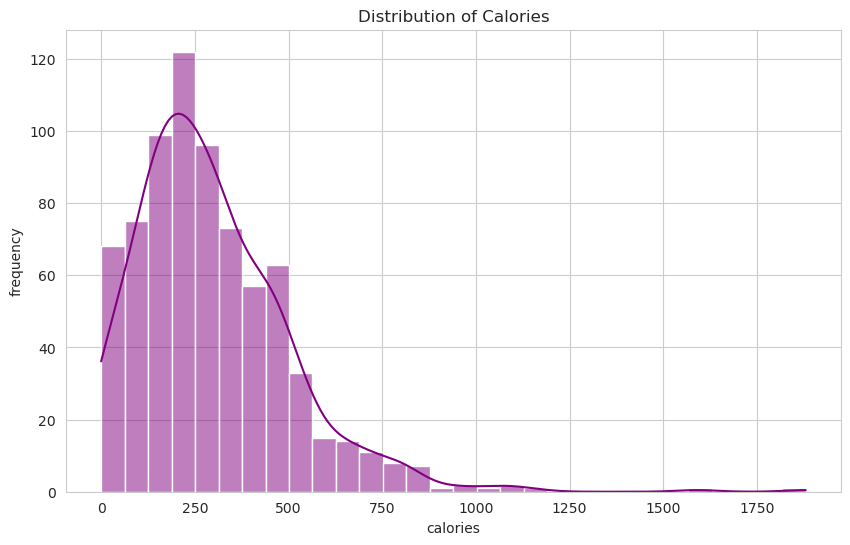

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=30, kde=True, color='purple')
plt.title('Distribution of Calories')
plt.xlabel('calories')
plt.ylabel('frequency')
plt.show()


### Calories vs Total Fat:

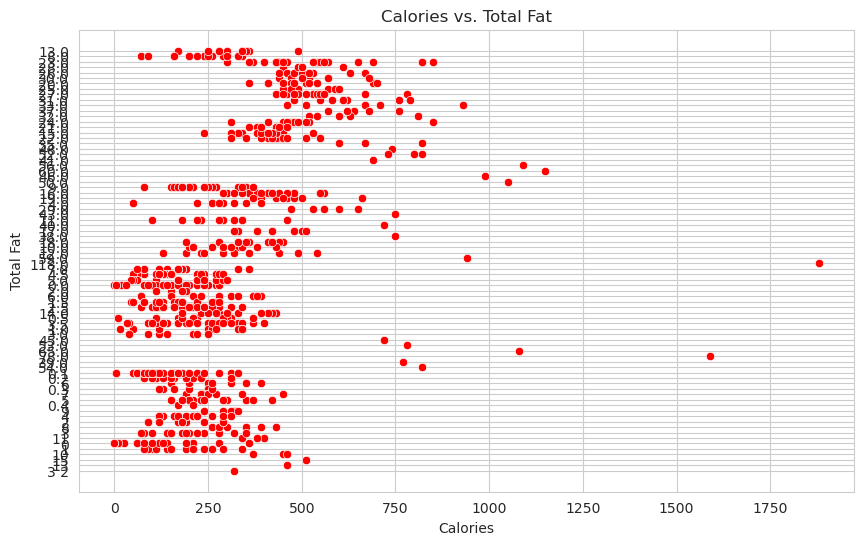

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='total fat (g)', data=df, color='red')
plt.title('Calories vs. Total Fat')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.show()




### Average Calories by Restaurant

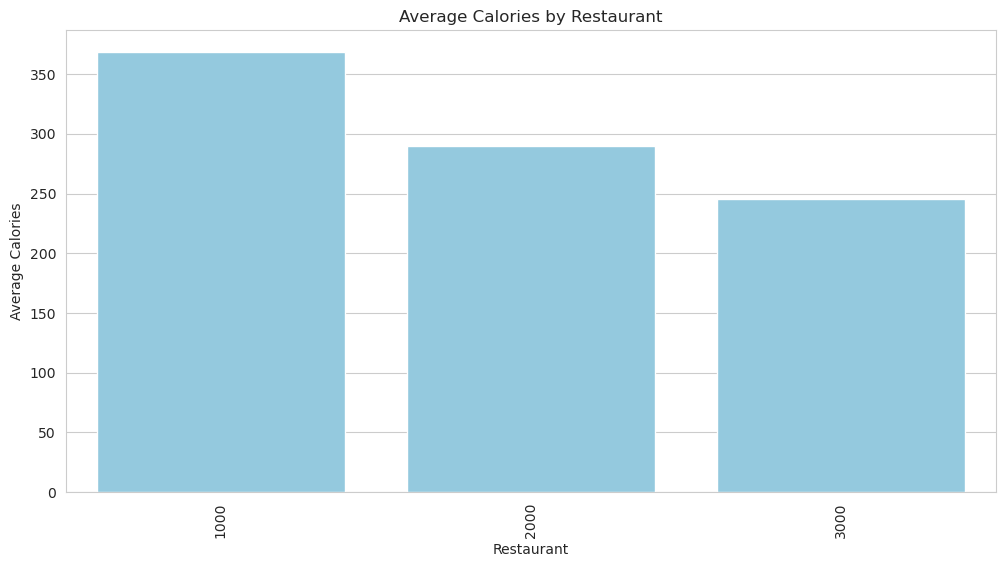

In [41]:
plt.figure(figsize=(12, 6))

# Group by restaurant and calculate average calories
avg_calories = df.groupby('restaurant id')['calories'].mean().sort_values(ascending=False)

# Create the bar plot without the confidence intervals
sns.barplot(x=avg_calories.index, y=avg_calories.values, color='skyblue', errorbar=None)  
plt.title('Average Calories by Restaurant')
plt.xticks(rotation=90)
plt.xlabel('Restaurant')
plt.ylabel('Average Calories')
plt.show()



### Insights
Based on the summary statistics and visualizations, we can derive some insights:

Caloric Content: The histogram of calorie distribution can show how many items fall within specific calorie ranges, indicating whether most items are high or low in calories.

Total Fat Relationship: The scatter plot between calories and total fat can reveal any correlation. Generally, higher-calorie foods tend to have higher fat content, and this relationship can be visualized clearly.

Restaurant Comparison: The bar plot of average calories by restaurant highlights which fast-food chains offer higher-calorie items, which can inform consumers about their choices.



## 7.

### Orginal Plotly code:

In [42]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

## Edited version:

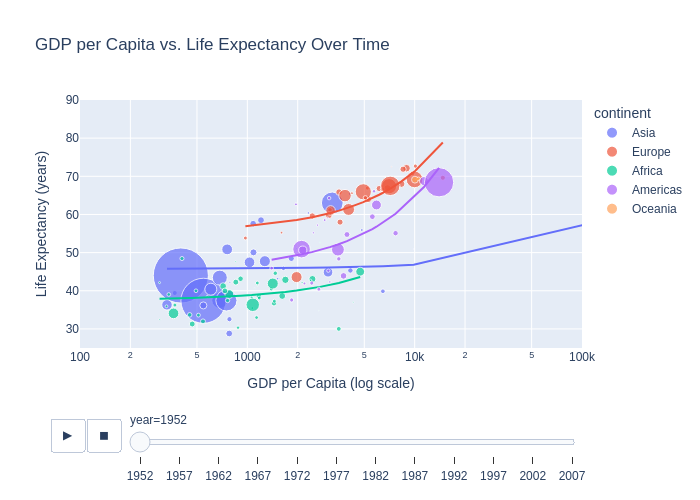

In [7]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Create a scatter plot with enhanced features
fig = px.scatter(df, 
                 x="gdpPercap", 
                 y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=60, 
                 range_x=[100, 100000], 
                 range_y=[25, 90],
                 color_continuous_scale=px.colors.sequential.Plasma,  # Change color scale
                 title="GDP per Capita vs. Life Expectancy Over Time",  # Add a title
                 labels={"gdpPercap": "GDP per Capita (log scale)", 
                         "lifeExp": "Life Expectancy (years)"},
                 trendline="ols"  # Add a trend line
                )

# Show the plot
fig.show(renderer="png")


## Key Changes Made
Color Palette: Changed the color palette to Plasma, which provides a visually appealing gradient.
Title and Labels: Added a meaningful title and customized labels for the x and y axes.
Adjusted Size: Increased the maximum size of the points for better visibility.
Trend Line: Added a linear trend line (trendline="ols") to visualize the relationship between GDP and life expectancy.


## Result

This modified plot will give a clearer understanding of the relationship between GDP per capita and life expectancy, highlighting trends over the years and making it more engaging for viewers.

## 8.

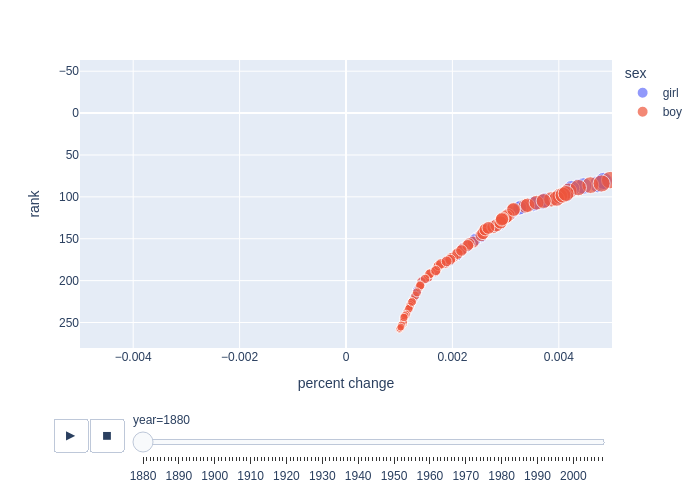

In [8]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate rank based on percent
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name', 'year'])

# Calculate the percent change
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort the values and restrict to common names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Restrict to "common" names

# Create the scatter plot with specified parameters
fig = px.scatter(bn, 
                 x="percent change", 
                 y="rank", 
                 animation_frame="year", 
                 animation_group="name", 
                 size="percent", 
                 color="sex", 
                 hover_name="name", 
                 size_max=50, 
                 range_x=[-0.005, 0.005])  # range_y removed

# Update the y-axis to reverse the rank order
fig.update_yaxes(autorange='reversed')  # Put rank 1 on top

# Show the plot (interactive version)
fig.show(renderer="png")

## Chatbot Summary

Certainly! Here's a detailed summary of our conversation today, including the code discussions and troubleshooting steps:

1. Data Visualization with Seaborn and Matplotlib
You encountered a ValueError while trying to create a scatter plot with Seaborn using columns "Calories" and "Total Fat" from a nutritional dataset. This error indicated that Seaborn could not interpret the specified column names.
We reviewed your approach to ensure the column names were correctly referenced, and I suggested verifying the column names in your DataFrame using df.columns.
2. Exploration of the Fast-Food Nutritional Database
You provided code to load the Fast-Food Nutritional Database from a URL and requested assistance with summary statistics and visualizations to explore interesting aspects of the data.
We discussed generating average calories by restaurant code, but you received a FutureWarning regarding the use of the palette parameter without a hue assignment. I explained that this warning indicates upcoming changes in future versions of Seaborn.
3. Using Plotly Express with Gapminder Dataset
You shared a Plotly scatter plot code using the Gapminder dataset, displaying GDP per capita against life expectancy, animated by year.
I provided insights on how to modify this code for various parameters, including adjusting the axes, animation groups, and color coding.
4. Animation Issues
You asked why the animation in your Plotly scatter plot wasn't functioning correctly. I outlined several troubleshooting steps:
Ensure you are using an interactive environment (like Jupyter Notebook).
Remove the renderer="png" option from fig.show() to allow for full interactivity.
Update Plotly to the latest version to avoid compatibility issues.
Verify that the dataset has sufficient data points for different years to facilitate smooth animation.
5. Baby Names Dataset
You then shared a code snippet aimed at visualizing trends in baby names using parameters that included "percent change", "rank", and others.
I provided a complete code example that would visualize the dataset according to your specifications while ensuring the animation worked correctly.
6. Final Code Adjustments
Throughout our discussion, I emphasized the importance of checking for data availability, ensuring appropriate parameter usage, and making necessary adjustments to enhance your visualizations.
The last shared code created an interactive scatter plot showing changes in baby name popularity over the years, categorized by sex and animated by year.
Conclusion
Your work has focused on using various datasets to create informative visualizations, primarily using Seaborn and Plotly Express. We've addressed specific errors and warnings and enhanced your understanding of how to manipulate and visualize data effectively.

If you need further assistance or have additional questions about these topics, feel free to ask!

https://chatgpt.com/share/66f5a807-2f20-8000-a5c6-825ddf98ba01